# NYC Airbnb Data Analysis

This Jupyter Notebook contains an exploratory data analysis of Airbnb listings in New York City using publicly available data from [Inside Airbnb](http://insideairbnb.com).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Load Dataset

In [4]:
df = pd.read_csv('nyc_airbnb_cleaned.csv')
df.shape

(37018, 54)

## Summary Statistics

In [6]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,21833.000000,37018.000000,37018.000000,25358.000000,37018.000000
mean,233.896808,29.226025,26.240721,0.819498,152.444892
std,455.382022,35.784675,65.675512,1.851575,144.302059
min,8.000000,1.000000,0.000000,0.010000,0.000000
25%,90.000000,30.000000,0.000000,0.080000,0.000000
50%,150.000000,30.000000,3.000000,0.260000,122.000000
75%,268.000000,30.000000,22.000000,0.940000,296.000000
max,20000.000000,1250.000000,3047.000000,120.430000,365.000000


## Average Price by Neighborhood

C:\Users\rhysm\AppData\Local\Temp\ipykernel_11848\1024954489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_neigh.values, y=avg_price_by_neigh.index, palette="viridis")


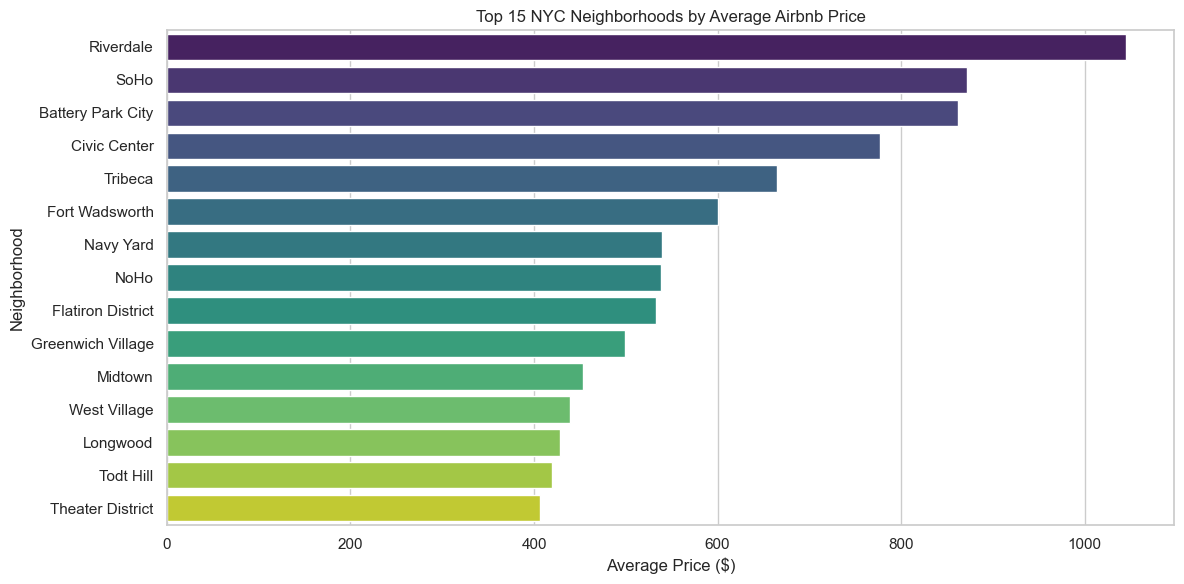

In [8]:
avg_price_by_neigh = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_neigh.values, y=avg_price_by_neigh.index, palette="viridis")
plt.title("Top 15 NYC Neighborhoods by Average Airbnb Price")
plt.xlabel("Average Price ($)")
plt.ylabel("Neighborhood")
plt.tight_layout()
plt.show()

## Average Price by Room Type

C:\Users\rhysm\AppData\Local\Temp\ipykernel_11848\2677471239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values, palette="coolwarm")


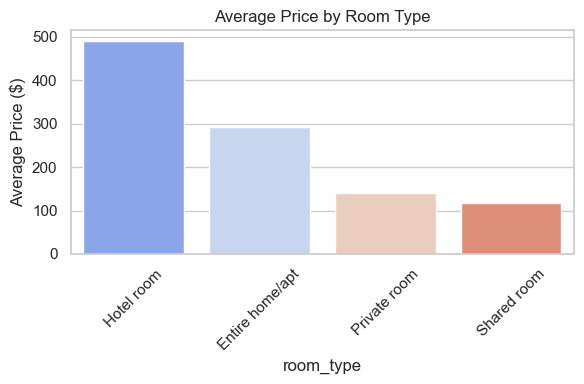

In [10]:
avg_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_price_by_room_type.index, y=avg_price_by_room_type.values, palette="coolwarm")
plt.title("Average Price by Room Type")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Price vs. Superhost Status

C:\Users\rhysm\AppData\Local\Temp\ipykernel_11848\2712053209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_superhost.index.astype(str), y=avg_price_by_superhost.values, palette="Set2")


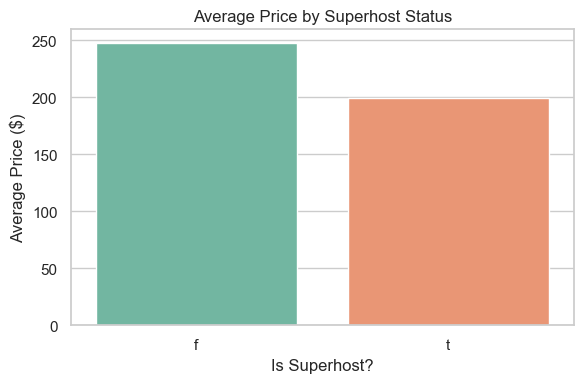

In [12]:
avg_price_by_superhost = df.groupby('host_is_superhost')['price'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_price_by_superhost.index.astype(str), y=avg_price_by_superhost.values, palette="Set2")
plt.title("Average Price by Superhost Status")
plt.xlabel("Is Superhost?")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()

## Reviews Per Month vs. Price

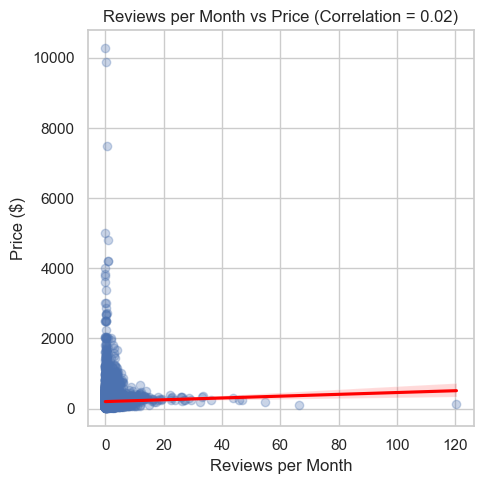

In [14]:
corr = df[['reviews_per_month', 'price']].corr().iloc[0, 1]
plt.figure(figsize=(5, 5))
sns.regplot(data=df, x='reviews_per_month', y='price', scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title(f"Reviews per Month vs Price (Correlation = {corr:.2f})")
plt.xlabel("Reviews per Month")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

## Distribution of Prices

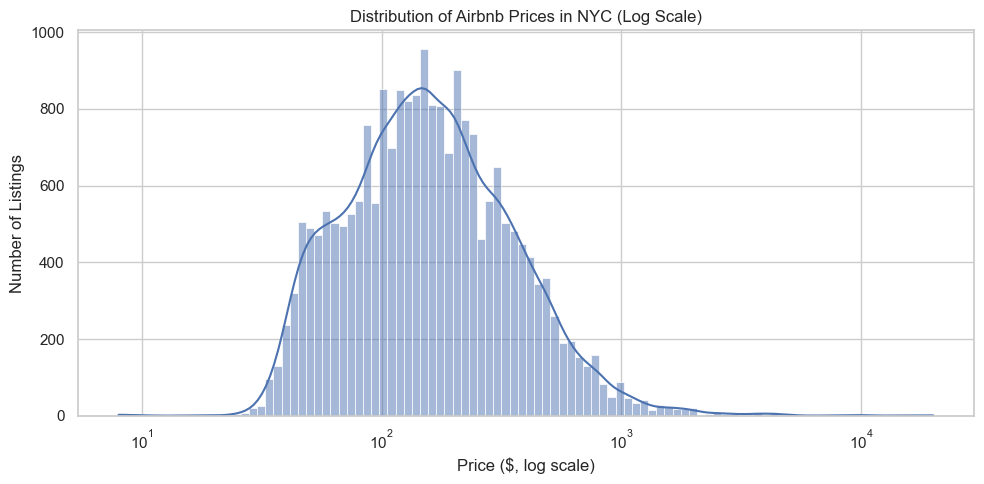

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True, log_scale=(True, False))
plt.title("Distribution of Airbnb Prices in NYC (Log Scale)")
plt.xlabel("Price ($, log scale)")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

## Availability vs. Price

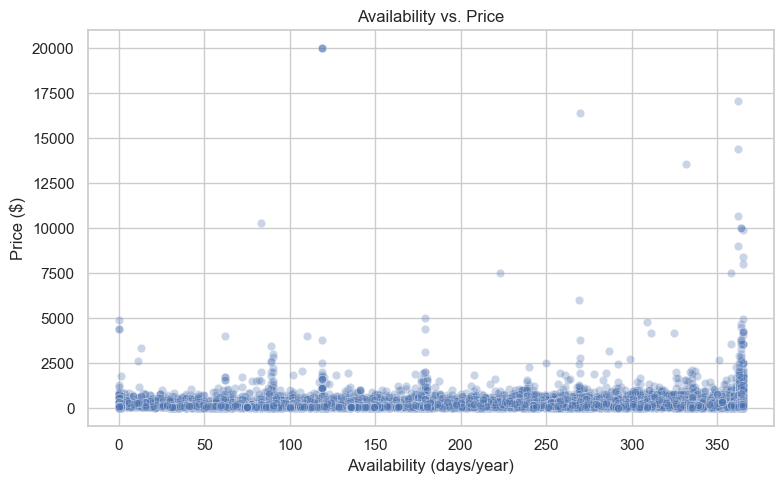

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.3)
plt.title("Availability vs. Price")
plt.xlabel("Availability (days/year)")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

## Business Insights

- Superhosts charge more on average, signaling trust and quality.
- Tribeca and SoHo have the highest nightly rates, reflecting location value.
- Entire homes dominate the top pricing tier.
- Listings with more frequent reviews tend to be priced higher.
- Room type and neighborhood heavily impact revenue potential.